<a href="https://colab.research.google.com/github/IBeliveInMagic/Covid_Dados/blob/main/LSTM_Covid_Data_Vacinacao_TESTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importações**

In [1]:
import requests
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# **Carregando os dados**

In [2]:
# Motando o drive para importar os datasets
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Carregando os dados parte 1 estado de Goiás 
df_DF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_estados/Dados-Part1-DF.csv',sep=';',low_memory=False)

# **Tratamento dos dados - Distrito Federal**

> Distrito Federal



In [4]:
df_DF

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,f481e1c6-30e4-4e73-8a72-78b2a9157b7d-i0b0,edce330fdd61aedd2ed9392bdaeaaa0282c4ac64804363...,45.0,1976-03-16,F,99.0,SEM INFORMACAO,530010,10,BRASILIA,...,1.0,Comorbidades,219VCD289W,ASTRAZENECA/FIOCRUZ,Organization/149,2022-02-24,Reforço,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
1,65438d64-390e-4de4-a1c7-6be33ca90347-i0b0,bafc9e0a25aef3ed2b695f7e603d8b3f804575d0d0fd3a...,29.0,1991-12-15,F,4.0,AMARELA,170040,10,ALMAS,...,8.0,Trabalhadores da Educação,FF8844,PFIZER,Organization/00394544000851,2021-09-14,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2,f4844a35-a211-4ac7-a994-fb5844a43aff-i0b0,bf62568d78d779a359b8ece3b957d2eaac335b4c0aa4fa...,54.0,1967-01-29,F,99.0,SEM INFORMACAO,530010,10,BRASILIA,...,1.0,Comorbidades,214VCD070W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-06-09,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
3,6557e31c-ac2f-4c78-a366-e32c8cfa0457-i0b0,a7f28b564a4104a88b938b03c49b8438ae4bf91280f3da...,12.0,2010-06-29,M,1.0,BRANCA,530010,10,BRASILIA,...,2.0,Faixa Etária,FP7498,PFIZER,28290,2022-07-23,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
4,f4985334-34b6-4a34-8a89-9bbdaed0752e-i0b0,eae69678c14c79bee58100e8ec2871c0a75158ddf63f07...,52.0,1969-02-11,F,3.0,PARDA,530010,10,BRASILIA,...,2.0,Faixa Etária,EY0579,PFIZER,Organization/00394544000851,2021-06-23,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360703,f894a118-c0df-4ee4-a908-c2d17d1bae14-i0b0,cd5702d6f50c7e875c0e26887c31697f5598486c36a2b2...,45.0,1975-08-17,F,1.0,BRANCA,530010,10,BRASILIA,...,2.0,Faixa Etária,202010021,SINOVAC/BUTANTAN,Organization/61189445000156,2021-01-21,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
2360704,f8ac51b5-fdd0-4832-b2bd-661bb67a8338-i0b0,492247b865879b044496dea46f01e73f2112a3dd94c34d...,45.0,1976-03-22,M,3.0,PARDA,530010,10,BRASILIA,...,2.0,Faixa Etária,FG3528,PFIZER,Organization/00394544000851,2021-10-14,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2360705,f8b7421b-099d-4a96-81c7-bd0d7633d5c3-i0b0,7f40d78674f5294af635983da826618a378a62cd64b63e...,33.0,1988-01-01,M,99.0,SEM INFORMACAO,530010,10,BRASILIA,...,15.0,População Privada de Liberdade,204B21A,JANSSEN,Organization/00394544000851,2021-09-22,Dose,88,COVID-19 JANSSEN - Ad26.COV2.S,Novo PNI
2360706,f8b80ecf-bf72-45be-b235-fdbdc012528c-i0b0,c9917e29e27b906956508f61e0b015a8b0d16f407ca928...,19.0,2001-10-26,F,3.0,PARDA,530010,10,BRASILIA,...,2.0,Faixa Etária,FD7222,PFIZER,Organization/00394544000851,2021-08-17,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI


IBGE - População estimada do Distrito Federal

3.094.325
pessoas
   [2021] : https://www.ibge.gov.br/cidades-e-estados/df/.html?

In [5]:
# mostra os nomes das colunas
df_DF.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

In [6]:
# Selecionar 3 colunas para a primeira análise
df_DF1 = df_DF.iloc[: , [0,28,30]]
df_DF1.head()

,document_id,vacina_descricao_dose,vacina_nome
0,f481e1c6-30e4-4e73-8a72-78b2a9157b7d-i0b0,Reforço,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
1,65438d64-390e-4de4-a1c7-6be33ca90347-i0b0,2ª Dose,COVID-19 PFIZER - COMIRNATY
2,f4844a35-a211-4ac7-a994-fb5844a43aff-i0b0,1ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
3,6557e31c-ac2f-4c78-a366-e32c8cfa0457-i0b0,1ª Dose,COVID-19 PFIZER - COMIRNATY
4,f4985334-34b6-4a34-8a89-9bbdaed0752e-i0b0,1ª Dose,COVID-19 PFIZER - COMIRNATY


In [7]:
df_DF1.groupby(['vacina_descricao_dose']).count()['document_id']

vacina_descricao_dose
1ª Dose                843309
1ª Dose Revacinação       613
1º Reforço                  1
2ª Dose                786115
2ª Dose Revacinação       786
2º Reforço             205257
3ª Dose                    12
3ª Dose Revacinação       334
3º Reforço               1902
4ª Dose Revacinação       370
Dose                    21802
Dose Adicional          20956
Reforço                478962
Revacinação               150
Única                     136
Name: document_id, dtype: int64

In [8]:
# Selecionar 7 colunas para a segunda análise
df_DF2 = df_DF.iloc[: , [0,2,20,21,22,23,30]]
df_DF2.head()

,document_id,paciente_idade,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_nome
0,f481e1c6-30e4-4e73-8a72-78b2a9157b7d-i0b0,45.0,107.0,Hipertensão de difícil controle ou com complic...,1.0,Comorbidades,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
1,65438d64-390e-4de4-a1c7-6be33ca90347-i0b0,29.0,801.0,Ensino Básico,8.0,Trabalhadores da Educação,COVID-19 PFIZER - COMIRNATY
2,f4844a35-a211-4ac7-a994-fb5844a43aff-i0b0,54.0,107.0,Hipertensão de difícil controle ou com complic...,1.0,Comorbidades,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
3,6557e31c-ac2f-4c78-a366-e32c8cfa0457-i0b0,12.0,206.0,Pessoas de 12 a 17 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY
4,f4985334-34b6-4a34-8a89-9bbdaed0752e-i0b0,52.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 PFIZER - COMIRNATY


In [9]:
# Selecionar 7 colunas para a segunda análise
df_DF3 = df_DF.iloc[: , [27,28]]
df_DF3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2022-02-24,Reforço
1,2021-09-14,2ª Dose
2,2021-06-09,1ª Dose
3,2022-07-23,1ª Dose
4,2021-06-23,1ª Dose


In [10]:
#converter a coluna vacina_dataAplicacao para o tipo datetime
df_DF3[['vacina_dataAplicacao']] = df_DF3[['vacina_dataAplicacao']].apply(pd.to_datetime)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [11]:
#Confirmando se trocou de tipo
df_DF3.dtypes

vacina_dataAplicacao     datetime64[ns]
vacina_descricao_dose            object
dtype: object

In [12]:
df_DF3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2022-02-24,Reforço
1,2021-09-14,2ª Dose
2,2021-06-09,1ª Dose
3,2022-07-23,1ª Dose
4,2021-06-23,1ª Dose


In [13]:
# Ordenando as vacinas pela data de aplicação , em ordem crescente de data
df_DF3 = df_DF3.query(" vacina_dataAplicacao >= '2021-01-01' ")
df_DF3.sort_values(by=['vacina_dataAplicacao'])

,vacina_dataAplicacao,vacina_descricao_dose
49051,2021-01-04,2ª Dose
2108601,2021-01-11,1ª Dose
2090956,2021-01-17,2ª Dose
1692949,2021-01-17,1ª Dose
362957,2021-01-18,2ª Dose
...,...,...
268835,2023-01-05,1ª Dose
1416716,2023-01-05,2º Reforço
1048871,2023-01-05,2º Reforço
1329880,2023-01-05,2º Reforço


Nas próximas duas células filtramos por mês as vacinas aplicadas no ano de 2021 e salvamos em diferentes DataFrames

In [14]:
df_21_DF3_mes1 = df_DF3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2021-01-31'")
df_21_DF3_mes2 = df_DF3.query(" vacina_dataAplicacao >= '2021-02-01' and vacina_dataAplicacao <= '2021-02-28'")
df_21_DF3_mes3 = df_DF3.query(" vacina_dataAplicacao >= '2021-03-01' and vacina_dataAplicacao <= '2021-03-31'")
df_21_DF3_mes4 = df_DF3.query(" vacina_dataAplicacao >= '2021-04-01' and vacina_dataAplicacao <= '2021-04-30'")
df_21_DF3_mes5 = df_DF3.query(" vacina_dataAplicacao >= '2021-05-01' and vacina_dataAplicacao <= '2021-05-31'")
df_21_DF3_mes6 = df_DF3.query(" vacina_dataAplicacao >= '2021-06-01' and vacina_dataAplicacao <= '2021-06-30'")

In [15]:
df_21_DF3_mes7 = df_DF3.query(" vacina_dataAplicacao >= '2021-07-01' and vacina_dataAplicacao <= '2021-07-31'")
df_21_DF3_mes8 = df_DF3.query(" vacina_dataAplicacao >= '2021-08-01' and vacina_dataAplicacao <= '2021-08-31'")
df_21_DF3_mes9 = df_DF3.query(" vacina_dataAplicacao >= '2021-09-01' and vacina_dataAplicacao <= '2021-09-30'")
df_21_DF3_mes10 = df_DF3.query(" vacina_dataAplicacao >= '2021-10-01' and vacina_dataAplicacao <= '2021-10-31'")
df_21_DF3_mes11 = df_DF3.query(" vacina_dataAplicacao >= '2021-11-01' and vacina_dataAplicacao <= '2021-11-30'")
df_21_DF3_mes12 = df_DF3.query(" vacina_dataAplicacao >= '2021-12-01' and vacina_dataAplicacao <= '2021-12-31'")

Na próxima célula filtramos por mês as vacinas aplicadas no ano de 2022 e salvamos em diferentes DataFrames

In [16]:
df_22_DF3_mes1 = df_DF3.query(" vacina_dataAplicacao >= '2022-01-01' and vacina_dataAplicacao <= '2022-01-31'")
df_22_DF3_mes2 = df_DF3.query(" vacina_dataAplicacao >= '2022-02-01' and vacina_dataAplicacao <= '2022-02-28'")
df_22_DF3_mes3 = df_DF3.query(" vacina_dataAplicacao >= '2022-03-01' and vacina_dataAplicacao <= '2022-03-31'")
df_22_DF3_mes4 = df_DF3.query(" vacina_dataAplicacao >= '2022-04-01' and vacina_dataAplicacao <= '2022-04-30'")
df_22_DF3_mes5 = df_DF3.query(" vacina_dataAplicacao >= '2022-05-01' and vacina_dataAplicacao <= '2022-05-31'")
df_22_DF3_mes6 = df_DF3.query(" vacina_dataAplicacao >= '2022-06-01' and vacina_dataAplicacao <= '2022-06-30'")

Agora agrupamos pela descrição de dose para analisarmos quantas pessoas receberam 1º Dose, 2º Dose , Dose Adicional e Reforço por mês do ano de 2021

In [17]:
df_22_DF3_mes6.groupby('vacina_descricao_dose').count()

,vacina_dataAplicacao
vacina_descricao_dose,
1ª Dose,3744
1ª Dose Revacinação,70
2ª Dose,7484
2ª Dose Revacinação,55
2º Reforço,76168
3ª Dose Revacinação,15
3º Reforço,485
4ª Dose Revacinação,34
Dose,365


In [18]:
df_21_DF3_mes1count = df_21_DF3_mes1.groupby('vacina_descricao_dose').count()
df_21_DF3_mes2count = df_21_DF3_mes2.groupby('vacina_descricao_dose').count()
df_21_DF3_mes3count = df_21_DF3_mes3.groupby('vacina_descricao_dose').count()
df_21_DF3_mes4count = df_21_DF3_mes4.groupby('vacina_descricao_dose').count()
df_21_DF3_mes5count = df_21_DF3_mes5.groupby('vacina_descricao_dose').count()
df_21_DF3_mes6count = df_21_DF3_mes6.groupby('vacina_descricao_dose').count()

In [19]:
df_21_DF3_mes7count = df_21_DF3_mes7.groupby('vacina_descricao_dose').count()
df_21_DF3_mes8count = df_21_DF3_mes8.groupby('vacina_descricao_dose').count()
df_21_DF3_mes9count = df_21_DF3_mes9.groupby('vacina_descricao_dose').count()
df_21_DF3_mes10count = df_21_DF3_mes10.groupby('vacina_descricao_dose').count()
df_21_DF3_mes11count = df_21_DF3_mes11.groupby('vacina_descricao_dose').count()
df_21_DF3_mes12count = df_21_DF3_mes12.groupby('vacina_descricao_dose').count()

In [20]:
df_22_DF3_mes1count = df_22_DF3_mes1.groupby('vacina_descricao_dose').count()
df_22_DF3_mes2count = df_22_DF3_mes2.groupby('vacina_descricao_dose').count()
df_22_DF3_mes3count = df_22_DF3_mes3.groupby('vacina_descricao_dose').count()
df_22_DF3_mes4count = df_22_DF3_mes4.groupby('vacina_descricao_dose').count()
df_22_DF3_mes5count = df_22_DF3_mes5.groupby('vacina_descricao_dose').count()
df_22_DF3_mes6count = df_22_DF3_mes6.groupby('vacina_descricao_dose').count()

In [21]:
DF_Vacina_Mes_1_21 = pd.merge(df_21_DF3_mes1count, df_21_DF3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_21', '_mes2_21'))
DF_Vacina_Mes_2_21 = pd.merge(DF_Vacina_Mes_1_21, df_21_DF3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_21', '_mes3_21'))
DF_Vacina_Mes_3_21 = pd.merge(DF_Vacina_Mes_2_21, df_21_DF3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_21', '_mes4_21'))
DF_Vacina_Mes_4_21 = pd.merge(DF_Vacina_Mes_3_21, df_21_DF3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_21', '_mes5_21'))
DF_Vacina_Mes_5_21 = pd.merge(DF_Vacina_Mes_4_21, df_21_DF3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_21', '_mes6_21'))
DF_Vacina_Mes_6_21 = pd.merge(DF_Vacina_Mes_5_21, df_21_DF3_mes7count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes6_21', '_mes7_21'))

In [22]:
DF_Vacina_Mes_7_21 = pd.merge(DF_Vacina_Mes_6_21, df_21_DF3_mes8count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes7_21', '_mes8_21'))
DF_Vacina_Mes_8_21 = pd.merge(DF_Vacina_Mes_7_21, df_21_DF3_mes9count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes8_21', '_mes9_21'))
DF_Vacina_Mes_9_21 = pd.merge(DF_Vacina_Mes_8_21, df_21_DF3_mes10count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes9_21', '_mes10_21'))
DF_Vacina_Mes_10_21 = pd.merge(DF_Vacina_Mes_9_21, df_21_DF3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_21', '_mes11_21'))
DF_Vacina_Mes_11_21 = pd.merge(DF_Vacina_Mes_10_21, df_21_DF3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_21', '_mes12_21'))
DF_Vacina_Mes_12_21 = pd.merge(DF_Vacina_Mes_11_21, df_22_DF3_mes1count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_21', '_mes1_22'))

In [23]:
DF_Vacina_Mes_1_22 = pd.merge(DF_Vacina_Mes_12_21, df_22_DF3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_22', '_mes2_22'))
DF_Vacina_Mes_2_22 = pd.merge(DF_Vacina_Mes_1_22, df_22_DF3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_22', '_mes3_22'))
DF_Vacina_Mes_3_22 = pd.merge(DF_Vacina_Mes_2_22, df_22_DF3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_22', '_mes4_22'))
DF_Vacina_Mes_4_22 = pd.merge(DF_Vacina_Mes_3_22, df_22_DF3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_22', '_mes5_22'))
DF_Vacina_Mes_5_22 = pd.merge(DF_Vacina_Mes_4_22, df_22_DF3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_22', '_mes6_22'))

In [24]:
#Imprimir o DataFrame Vacina_Mes_11 que corresponde todos os os meses juntos
DF_Vacina_Mes_5_22

,vacina_dataAplicacao_mes1_21,vacina_dataAplicacao_mes2_21,vacina_dataAplicacao_mes3_21,vacina_dataAplicacao_mes4_21,vacina_dataAplicacao_mes5_21,vacina_dataAplicacao_mes6_21,vacina_dataAplicacao_mes7_21,vacina_dataAplicacao_mes8_21,vacina_dataAplicacao_mes9_21,vacina_dataAplicacao_mes10_21,vacina_dataAplicacao_mes11_21,vacina_dataAplicacao_mes12_21,vacina_dataAplicacao_mes1_22,vacina_dataAplicacao_mes2_22,vacina_dataAplicacao_mes3_22,vacina_dataAplicacao_mes4_22,vacina_dataAplicacao_mes5_22,vacina_dataAplicacao_mes6_22
vacina_descricao_dose,,,,,,,,,,,,,,,,,,
1ª Dose,15766.0,26592.0,59196.0,47897.0,63712.0,115146.0,109861.0,232361.0,62592.0,14129.0,9270.0,6721.0,25621.0,25466.0,6859.0,2605.0,2131.0,3744.0
2ª Dose,33.0,15029.0,11159.0,58498.0,23006.0,6396.0,65870.0,85319.0,136441.0,136885.0,99384.0,50528.0,18682.0,11872.0,23097.0,11453.0,6980.0,7484.0
Dose Adicional,3.0,3.0,NaN,NaN,NaN,10.0,7.0,3.0,1146.0,2308.0,1588.0,2907.0,3271.0,2188.0,1070.0,863.0,1450.0,2438.0
Reforço,2.0,4.0,9.0,2.0,1.0,4.0,5.0,10.0,2769.0,38251.0,28995.0,56321.0,93033.0,66087.0,56762.0,21493.0,19121.0,41003.0
Dose,NaN,NaN,2.0,NaN,NaN,5104.0,12357.0,1515.0,523.0,238.0,2.0,41.0,89.0,175.0,300.0,261.0,238.0,365.0
Única,NaN,NaN,60.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2ª Dose Revacinação,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,55.0
2º Reforço,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2.0,2.0,5.0,13.0,9.0,22.0,98.0,15577.0,30335.0,76168.0
1ª Dose Revacinação,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2.0,2.0,NaN,8.0,NaN,7.0,15.0,70.0


In [25]:
# Transposta do DataFrame Vacina_Mes_11
DF_Vacina_Mes_5_22.T

vacina_descricao_dose,1ª Dose,2ª Dose,Dose Adicional,Reforço,Dose,Única,2ª Dose Revacinação,2º Reforço,1ª Dose Revacinação,3ª Dose,3ª Dose Revacinação,1º Reforço,3º Reforço,4ª Dose Revacinação,Revacinação
vacina_dataAplicacao_mes1_21,15766.0,33.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes2_21,26592.0,15029.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes3_21,59196.0,11159.0,NaN,9.0,2.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes4_21,47897.0,58498.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes5_21,63712.0,23006.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes6_21,115146.0,6396.0,10.0,4.0,5104.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes7_21,109861.0,65870.0,7.0,5.0,12357.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes8_21,232361.0,85319.0,3.0,10.0,1515.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes9_21,62592.0,136441.0,1146.0,2769.0,523.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes10_21,14129.0,136885.0,2308.0,38251.0,238.0,NaN,1.0,2.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN


In [26]:
#Susbtituir os valores NaN por 0
DF_Count_Mes_Dose = DF_Vacina_Mes_5_22.T.replace(np.nan,0)

Substituir vacina_dataAplicacao_mes1 por VA1

In [27]:
DF_Count_Mes_Dose.index = ["Janeiro-2021","Fevereiro-2021","Março-2021","Abril-2021","Maio-2021","Junho-2021","Julho-2021","Agosto-2021","Setembro-2021","Outubro-2021","Novembro-2021","Dezembro-2021","Janeiro-2022","Fevereiro-2022","Março-2022","Abril-2022","Maio-2022","Junho-2022"]

In [28]:
DF_Count_Mes = df_DF3.groupby('vacina_dataAplicacao').count()

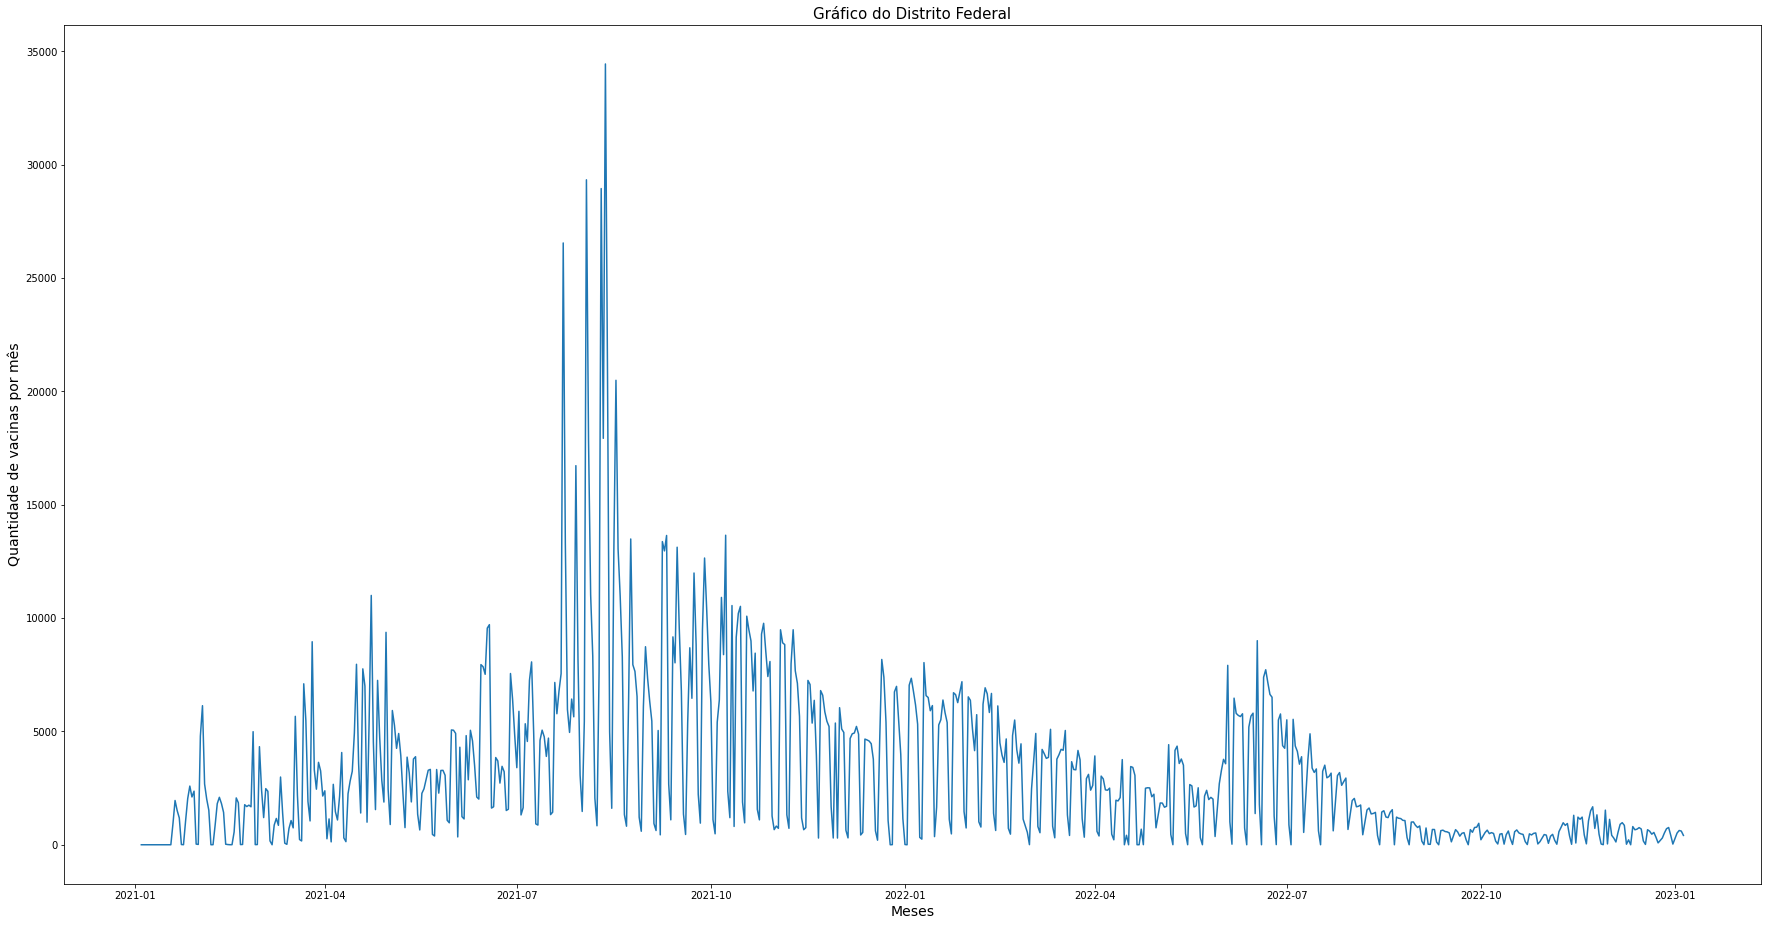

In [31]:
plt.figure(figsize=(30.4,15.8))
plt.title("Gráfico do Distrito Federal",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 14)
plt.xlabel('Meses',fontsize = 14)
plt.plot(DF_Count_Mes)
plt.show()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = DF_Count_Mes

# **Preparando os dados**

In [52]:
X = DF_Count_Mes['vacina_descricao_dose'].values
X = (X - np.min(X)) / (np.max(X) - np.min(X))

In [ ]:
#X

In [54]:
# Conjunto de pontos passados para o modelo LSTM
window = 10

n = DF_Count_Mes.shape[0]

# Separar os dados em 80% treino e 20% teste
last = int(n/5.0)
Xtrain = X[:-last]
Xtest = X[-last-window:]

# Armarzenar window números de pontos em uma sequência
xin = []
next_X = []
for i in range(window,len(Xtrain)):
    xin.append(Xtrain[i-window:i])
    next_X.append(Xtrain[i])

# Transformar os dados para o formato LSTM
xin, next_X = np.array(xin), np.array(next_X)
xin = xin.reshape(xin.shape[0], xin.shape[1], 1)
#print(xin[0:5])

# **Modelo LSTM**

In [55]:
# Keras é uma interface do TensorFlow
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Inicializar modelo LSTM

m = Sequential()
m.add(LSTM(units=50, return_sequences=True, input_shape=(xin.shape[1],1)))
m.add(Dropout(0.2))
m.add(LSTM(units=50))
m.add(Dropout(0.2))
m.add(Dense(units=1))
m.compile(optimizer = 'adam', loss = 'mean_squared_error')

Epoch 1/50
12/12 [==============================] - 5s 31ms/step - loss: 0.0156
Epoch 2/50
12/12 [==============================] - 0s 33ms/step - loss: 0.0111
Epoch 3/50
12/12 [==============================] - 0s 33ms/step - loss: 0.0111
Epoch 4/50
12/12 [==============================] - 0s 30ms/step - loss: 0.0104
Epoch 5/50
12/12 [==============================] - 0s 31ms/step - loss: 0.0111
Epoch 6/50
12/12 [==============================] - 0s 36ms/step - loss: 0.0104
Epoch 7/50
12/12 [==============================] - 0s 19ms/step - loss: 0.0104
Epoch 8/50
12/12 [==============================] - 0s 17ms/step - loss: 0.0106
Epoch 9/50
12/12 [==============================] - 0s 17ms/step - loss: 0.0106
Epoch 10/50
12/12 [==============================] - 0s 17ms/step - loss: 0.0105
Epoch 11/50
12/12 [==============================] - 0s 17ms/step - loss: 0.0106
Epoch 12/50
12/12 [==============================] - 0s 16ms/step - loss: 0.0108
Epoch 13/50
12/12 [==================

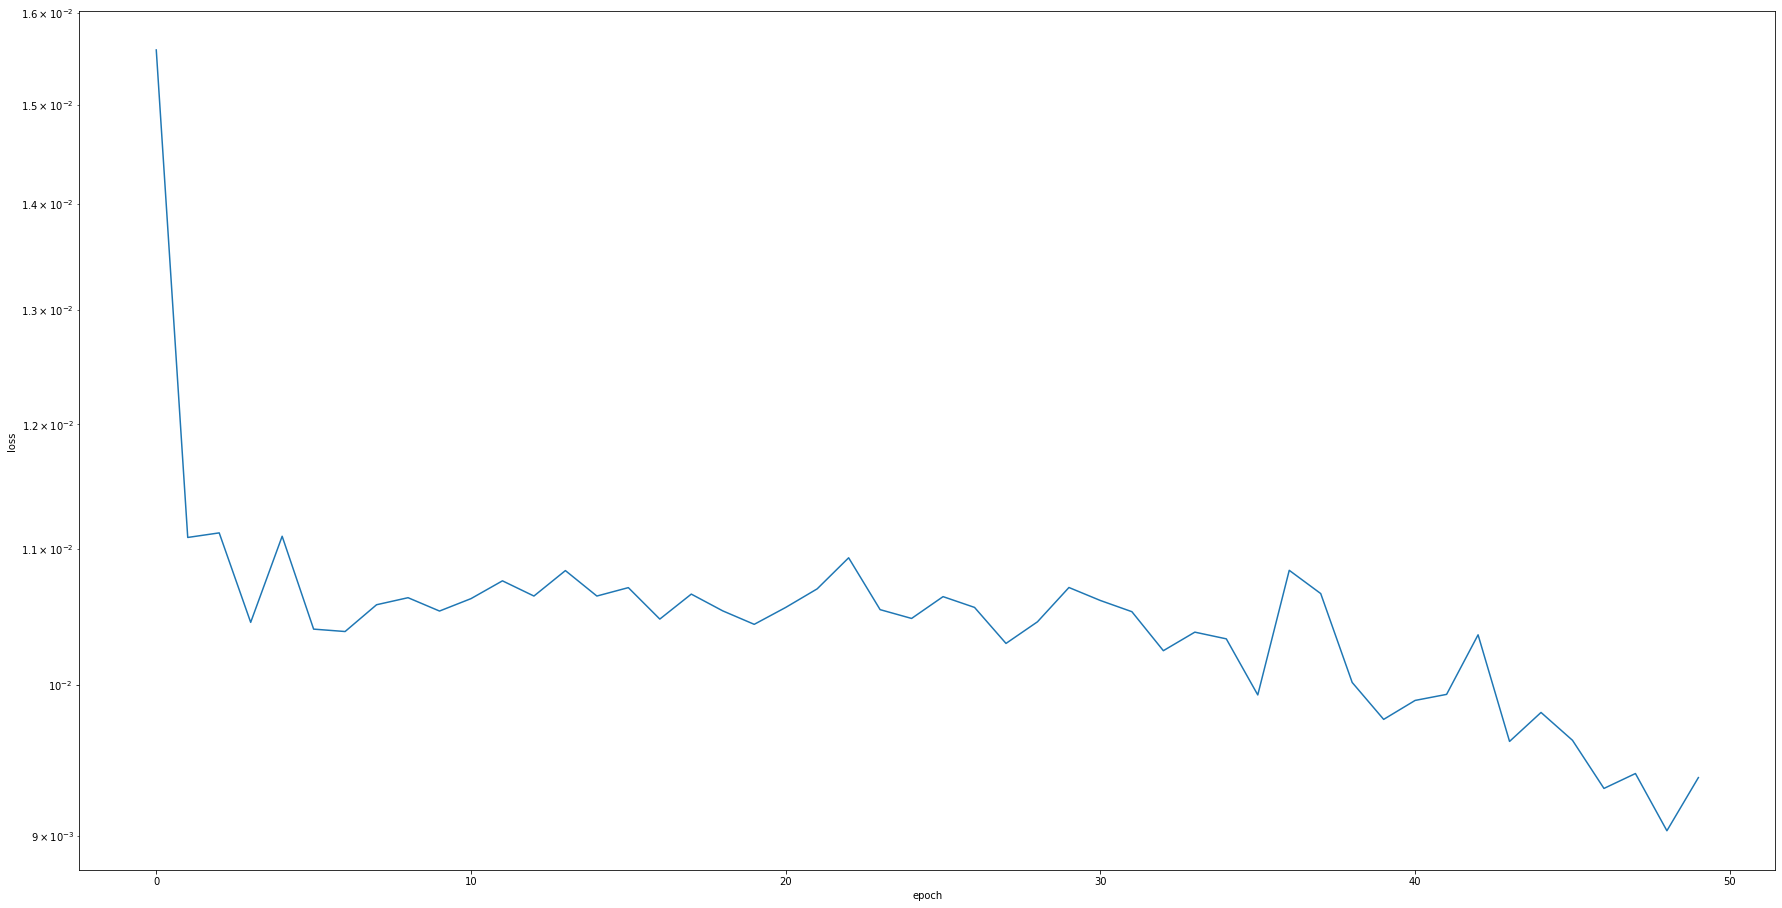

In [56]:
# Modelo LSTM fit
history = m.fit(xin, next_X, epochs = 50, batch_size = 50, verbose = 1)

plt.figure(figsize=(30.4,15.8))
plt.ylabel('loss'); plt.xlabel('epoch')
plt.semilogy(history.history['loss'])

# **Validação**

5/5 [==============================] - 1s 5ms/step


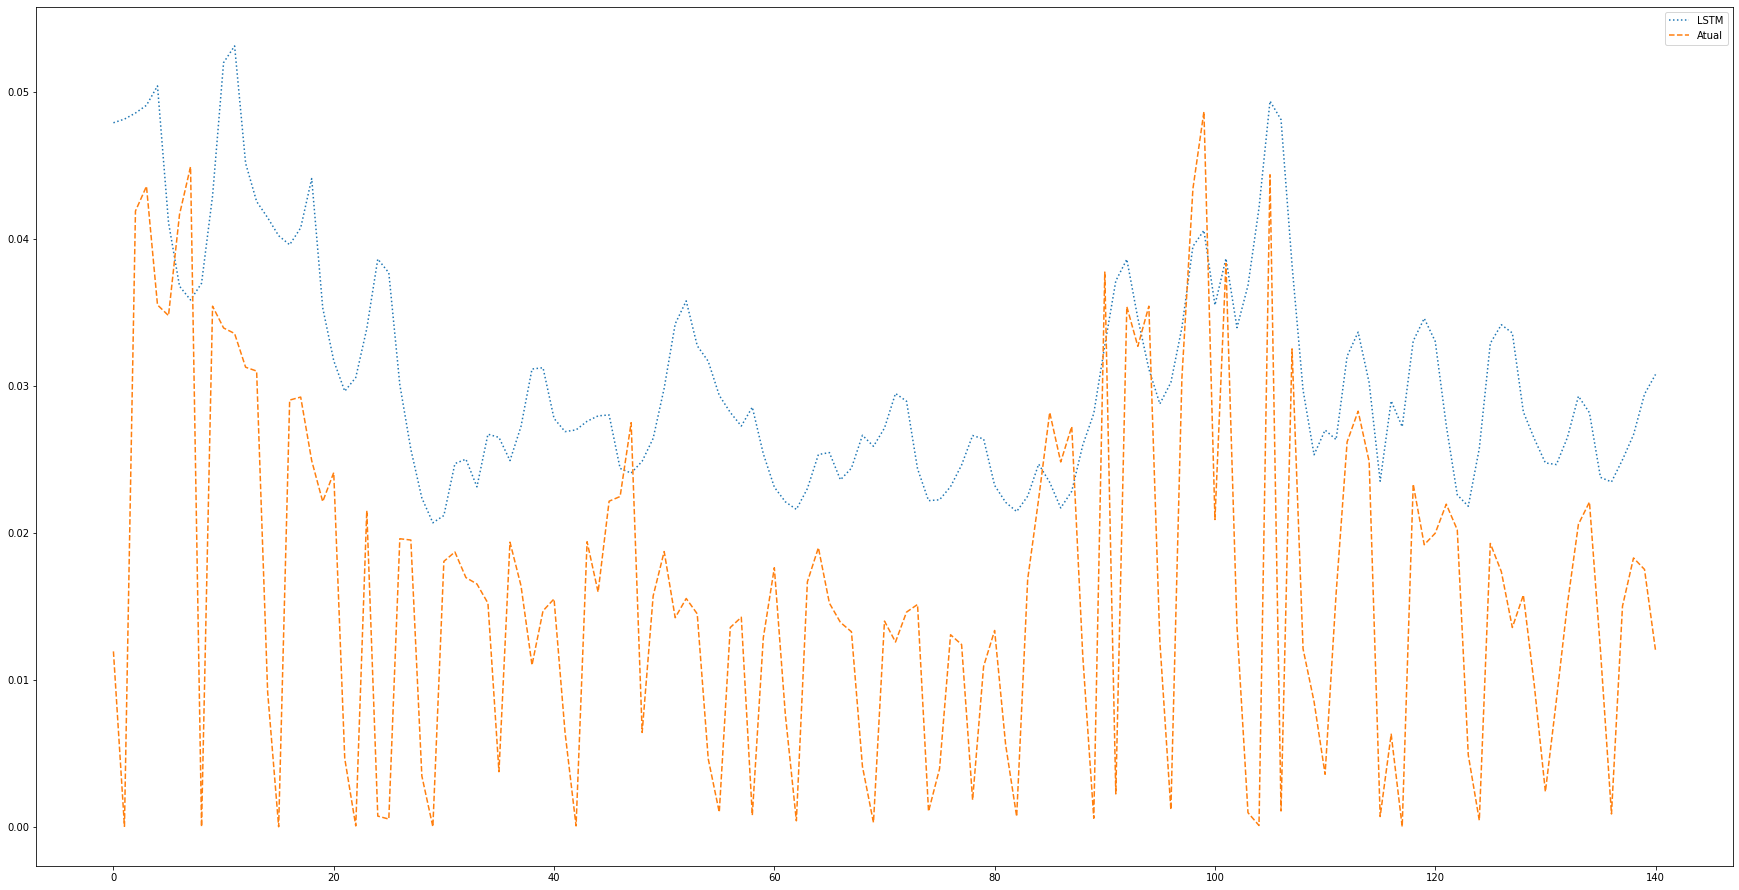

In [57]:
# Armazenar "window" pontos em uma sequência
xin = []
next_x1 = []

for i in range(window, len(Xtest)):
  xin.append(Xtest[i-window:i])
  next_x1.append(Xtest[i])

# Transformar os dados para o formato LSTM
xin, next_x1 = np.array(xin), np.array(next_x1)
xin = xin.reshape((xin.shape[0], xin.shape[1], 1))

# Predizer o próximo valor (1 passo a frente)
X_pred = m .predict(xin)

# Mostrar predição VS dados de teste atual
plt.figure(figsize=(30.4,15.8))
plt.plot(X_pred, ':', label = 'LSTM')
plt.plot(next_x1, '--', label='Atual')
plt.legend()

# **Forecasting**

1/1 [==============================] - 0s 21ms/step


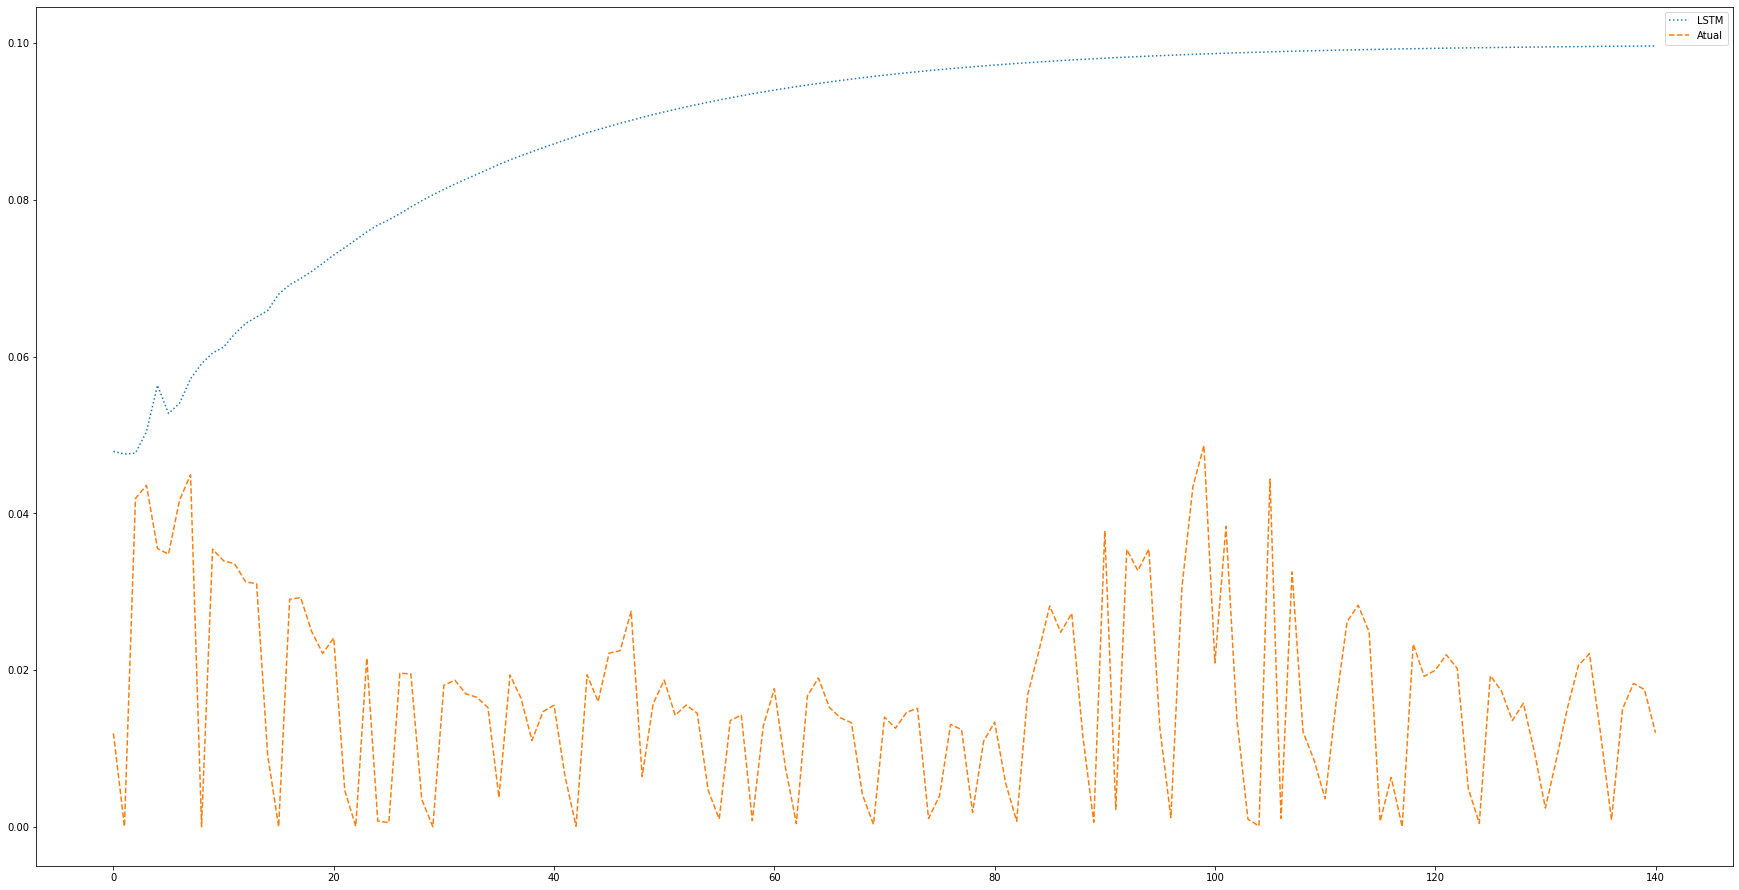

In [58]:
# Usando valores preditivos para predizer o próximo passo

X_pred = Xtest.copy()
for i in range(window, len(X_pred)):
  xin = X_pred[i-window:i].reshape((1, window, 1))
  X_pred[i] = m.predict(xin)

# Mostrar predição VS dados do teste atual
plt.figure(figsize=(30.4,15.8))
plt.plot(X_pred[window:], ':', label='LSTM')
plt.plot(next_x1, '--', label='Atual')
plt.legend()